## Observations and Insights 

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
timepoint_df = merge_df.groupby("Timepoint")
#merge_df.duplicated(subset=["Mouse ID"])
timepoint_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.



In [25]:
# Checking the number of mice in the clean DataFrame.
cleaned = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned['Mouse ID'].count()

1888

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_grouped = cleaned.groupby("Drug Regimen")
STD_df = regimen_grouped.std()
SEM_df = regimen_grouped.sem()
regimen_stats = pd.DataFrame({#"Number of Unique Items":purchase_data[Item ID].nunique(),
                "Mean":regimen_grouped["Tumor Volume (mm3)"].mean(),
                "Median":regimen_grouped["Tumor Volume (mm3)"].median(),
                "Varience":regimen_grouped["Tumor Volume (mm3)"].var(),
                "STD": STD_df["Tumor Volume (mm3)"],
                "SEM": SEM_df["Tumor Volume (mm3)"]
              })

#regimen_grouped.std()
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_stats


,Mean,Median,Varience,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar and Pie Charts

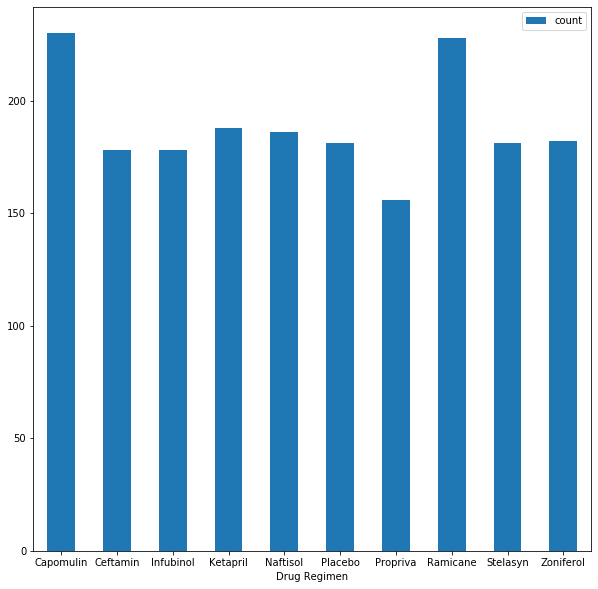

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
cleaned.count()
#adjusted_df = unique_df.drop(columns=['Drug Regimen'])
#adjusted_df
#cleaned['Mouse ID'].count()

count_df = pd.DataFrame({#"Number of Unique Items":purchase_data[Item ID].nunique(),
                "count":regimen_grouped["Tumor Volume (mm3)"].count()
              })
count_df
ax = count_df.plot.bar( y='count', rot=0, figsize= (10,10))

<BarContainer object of 10 artists>

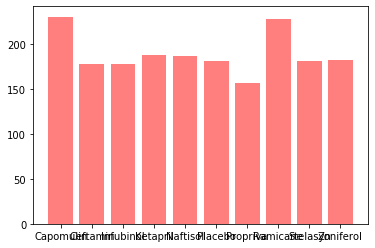

In [75]:

plt.bar(count_df.index, count_df['count'], color = 'red',  alpha= 0.5, align="center") 

Text(0.5, 1.0, 'Male vs Female')

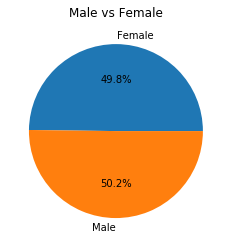

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Gender_df = merge_df.groupby('Sex')
#unique_df = Gender_df.duplicated(subset=["Mouse ID"])
#plot = Gender_display_df.plot.pie(y='Total Count', figsize=(5, 5))
labels = ['Female', 'Male']
Gender_df_display = Gender_df.nunique()
plt.pie(Gender_df_display['Mouse ID'],labels = labels, autopct='%1.1f%%')
plt.title('Male vs Female')
#Gender_df_display

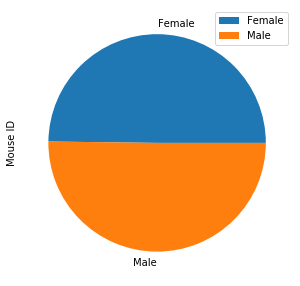

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pandas
 
#merge_df.head(10)
Gender_df = merge_df.groupby('Sex')
#unique_df = Gender_df.duplicated(subset=["Mouse ID"])
#plot = Gender_display_df.plot.pie(y='Total Count', figsize=(5, 5))

Gender_df_display = Gender_df.nunique()
#pd.DataFrame({#"Number of Unique Items":purchase_data[Item ID].nunique(),
               # "Male":Gender_df["Tumor Volume (mm3)"].mean(),
               # "Female":Gender_df["Tumor Volume (mm3)"].median()
             # })

#my_labels = 'Male','Female'
#plt.pie(Gender_df[Sex],labels=my_labels,autopct='%1.1f%%')
#plt.title('Male vs Female')
#plt.axis('equal')
#plt.show()

plot = Gender_df_display.plot.pie(y='Mouse ID', figsize=(5, 5))


## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 
#ID_df = merge_df.set_index('Mouse ID')
#dropped_df = indexed_df.drop(index = ['Ketapril','Naftisol','Placebo','Stelasyn', 'Zoniferolk'])

Id_df = merge_df.groupby("Mouse ID")
Calculations_df=pd.DataFrame({
             "Timepoint": Id_df["Timepoint"].max(),
            })

#indexed_df

merged_df = pd.merge(Calculations_df, merge_df, on=["Mouse ID","Timepoint"])
indexed_df = merged_df.set_index('Drug Regimen')
dropped_df = indexed_df.drop(index = ['Ketapril','Naftisol','Placebo','Stelasyn','Zoniferol','Propriva'])
dropped_df


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Ceftamin,a275,45,Female,20,28,62.999356,3
Ramicane,a411,45,Male,3,22,38.407618,1
Ramicane,a444,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
Ceftamin,y769,45,Female,6,27,68.594745,4
Capomulin,y793,45,Male,17,17,31.896238,2
Ceftamin,y865,45,Male,23,26,64.729837,3


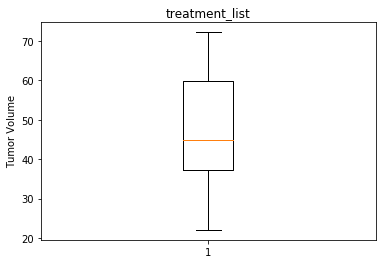

In [221]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
treatment_list = list(dropped_df['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
    
quartiles = dropped_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

fig1, ax1 = plt.subplots()
ax1.set_title('treatment_list')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(treatment_list)
plt.show()

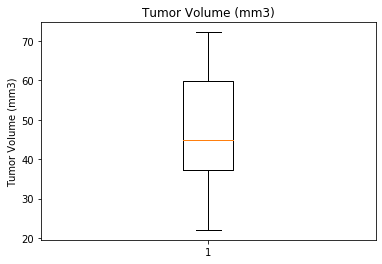

In [219]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(dropped_df['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

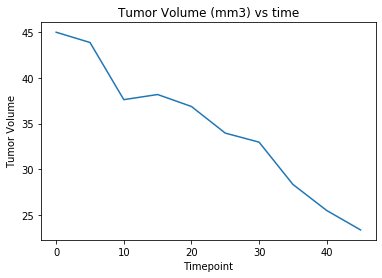

In [227]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Indexed_2_df = merge_df.set_index('Drug Regimen')
Capomulin_df = Indexed_2_df.drop(index = ['Ramicane', 'Infubinol', 'Ceftamin'])
Mouse_ID_df = Capomulin_df.set_index('Mouse ID')
Mouse_ID_df
y = Mouse_ID_df.loc["s185", "Tumor Volume (mm3)"]
x = Mouse_ID_df.loc["s185", "Timepoint"]
plt.plot(x, y)
plt.title("Tumor Volume (mm3) vs time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")


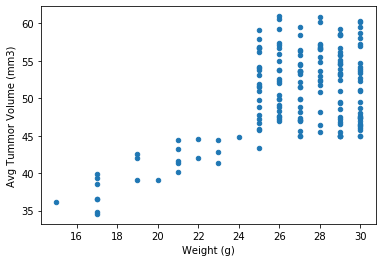

In [238]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Grouped_ID_df= Mouse_ID_df.groupby('Mouse ID')
graph_df=pd.DataFrame({
             "Avg Tummor Volume (mm3)": Grouped_ID_df["Tumor Volume (mm3)"].mean(),
             "Weight (g)": Grouped_ID_df["Weight (g)"].mean()
            })
ax = graph_df.plot.scatter(x='Weight (g)', y='Avg Tummor Volume (mm3)')

## Correlation and Regression

The r-squared is: 0.33901033635836186
y = 0.32x + 10.25


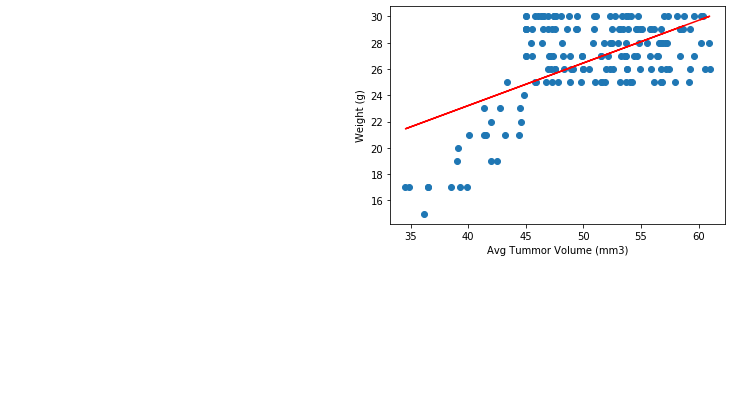

In [242]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = graph_df['Avg Tummor Volume (mm3)']
y_values = graph_df['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.xlabel('Avg Tummor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()
